# 多分类问题

手写数字图像识别，可应用场景：打标签、手势识别等

## 1. 导入包，并打印版本信息

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist
models = tf.keras.models
layers = tf.keras.layers
activations = tf.keras.activations
optimizers = tf.keras.optimizers
losses = tf.keras.losses

print('tensorflow: ' + tf.__version__)
print('numpy: ' + np.__version__)
print('matplotlib: ' + matplotlib.__version__)


tensorflow: 1.14.0
numpy: 1.16.4
matplotlib: 3.1.0


## 2. 准备样本数据
tf框架自带一些测试数据

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. 打印数据格式

In [3]:
print('x_train.shape: ' + str(x_train.shape))
print('y_train.shape: ' + str(y_train.shape))

print('x_test.shape: ' + str(x_test.shape))
print('y_test.shape: ' + str(y_test.shape))

print(y_train)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)
[5 0 4 ... 5 6 8]


## 4. 使用matplotlib显示图片数据

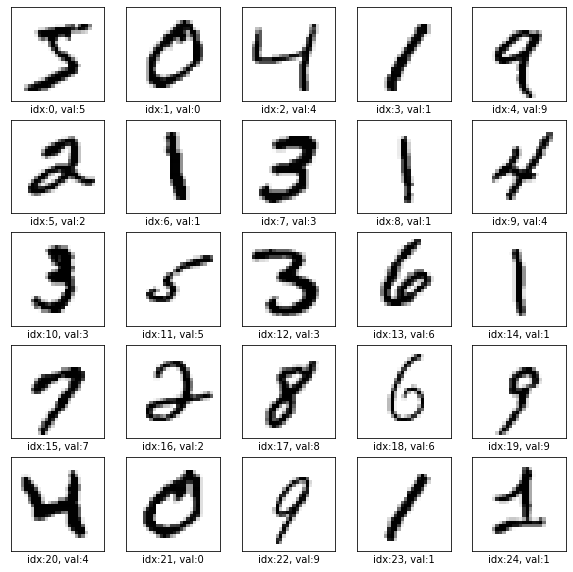

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.grid(True)
    plt.xlabel('idx:' + str(i) + ', val:' + str(y_train[i]))
plt.show()

## 5. 处理数据

灰度值为整数值，处理成浮点数

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## 6. 创建模型

In [6]:
 model = models.Sequential(
        [
            layers.Flatten(input_shape=(28, 28)),
            # NOTE： 飞驰人生：一顿操作猛如虎，定睛一看原地杵。
            layers.Dense(512, activation=activations.relu),
            layers.Dense(10, activation=activations.softmax)
        ])

W0801 10:15:09.003035 140261702993728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 7. 编译模型

In [7]:
model.compile(
        optimizer=optimizers.Adam(),
        loss=losses.sparse_categorical_crossentropy,
        metrics=['accuracy'])

## 8. 训练模型

In [8]:
model.fit(x_train, y_train, epochs=5)  

Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2030 - acc: 0.9402
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0810 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0525 - acc: 0.9833
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0369 - acc: 0.9881
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0277 - acc: 0.9909


## 9. 使用测试集评估模型

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.0736 - acc: 0.9783


[0.07359578983464161, 0.9783]

## 10. 使用模型预测结果

对测试集前100个样本做预测

In [10]:
x_samples = x_test[:100]
y_samples = y_test[:100]

predications = model.predict(x_samples)

## 11. 简单看一下预测结果

In [11]:
print('shape: '+ str(predications.shape))
print('predications[0]: ' + str(predications[0]))

shape: (100, 10)
predications[0]: [1.1895962e-09 9.5710480e-09 2.2845140e-07 8.0944756e-06 1.8719874e-12
 4.6106303e-11 2.3712096e-14 9.9998879e-01 1.4390279e-08 2.8580441e-06]


## 12. 使用图形显示100个结果

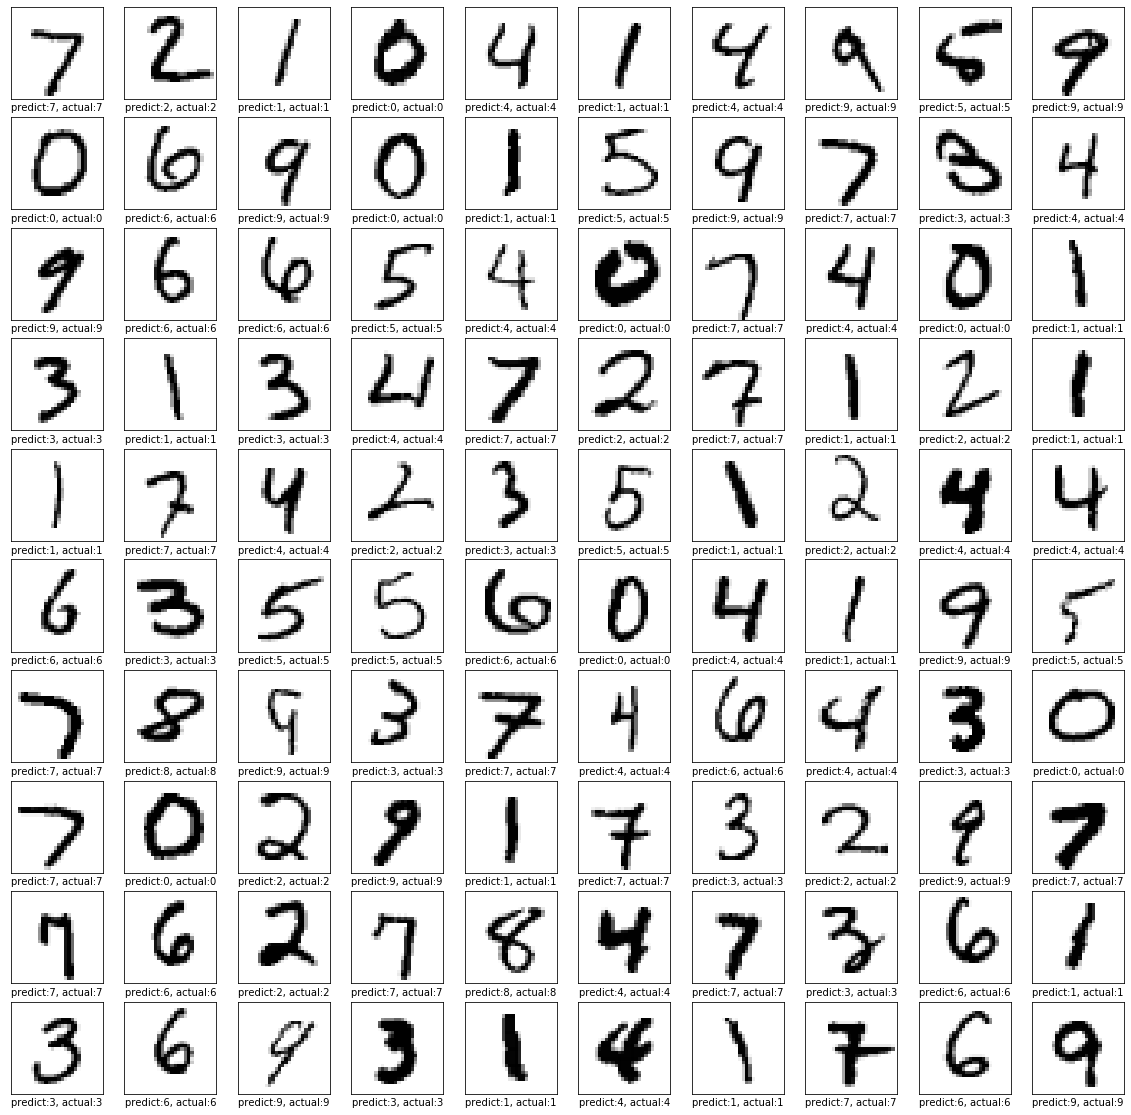

In [12]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_samples[i], cmap=plt.cm.binary)
    plt.grid(True)
    if np.argmax(predications[i]) != y_samples[i]:
        plt.xlabel('predict:' + str(np.argmax(predications[i])) + ', actual:' + str(y_samples[i]), color='red')
    else:
        plt.xlabel('predict:' + str(np.argmax(predications[i])) + ', actual:' + str(y_samples[i]))
plt.show()